<a href="https://colab.research.google.com/github/djibril6/djibril6-OptimizationAlgorithms-/blob/main/ParticleSwarm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Particle Swarm Optimization
## Djibril ISSOUFOU MAMAN

In [2]:
%matplotlib inline 

from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
import numpy as np
import time

## Particle Swarm algorithme

In [500]:
def pso(cost_function, interval, swarm_size = 20, dimension=1, w=0.72, lambd=2.1, iteration=500, minimization=True, seed=1):
  """
    Particle Swarm optimization function
    Parameters: 
        cost_function: The cost function we want to optimize. Ex: f(x)
        interval: the interval for searching parameter. Ex: ([-3, -2], [3, 2])
        swarm_size: the number of particle (Kuş) we want to use
        dimension: number or parameter for the cost_function. Ex: dimension=2 if there are 2, x and y
        lambd: Value of parameter lamdda, 2.1 by default
        iteration: number of iteration, 
        minimization: Set True if we want to minimize the cos_function
        seed to try the algorithm with different seed value

    Return:
        this function print the best minimum or maximum found and print the convergence of the algorithme over time
        And return best_fitness_global_list the list of best fitness found for every iteration
  """
  
  tic = time.time()
  min = 0
  max = 0
  if len(interval) == 1:
    min = np.ones((dimension, 1)) * interval[0][0]
    max = np.ones((dimension, 1)) * interval[0][1]
  else:
    min, max = interval
    min = np.array(min).reshape(dimension, 1)
    max = np.array(max).reshape(dimension, 1)

  ## INITIALIZATION OF PARICLES
  np.random.seed(seed)
  current_position = min + (max - min) * np.random.randn(dimension, swarm_size) ## Particles position
  current_fitness = cost_function(current_position) ## the result has (1, swarm_size) dimension
  current_fitness = current_fitness.reshape(swarm_size, 1).T
  best_position = current_position
  best_fitness = current_fitness
  np.random.seed(seed)
  velocity = 0 * np.random.randn(dimension, swarm_size) ## Velocity
  best_index_g = 1
  best_fitness_global_list = []

  for i in range(iteration):
    if minimization:
      best_index_g = np.argmin(best_fitness)
    else:
      best_index_g = np.argmax(best_fitness) 

    best_fitness_global_list.append(best_fitness[:, best_index_g]) ## then after we can plot the fitness evolution

    ## MOVING OF PARTICLES (KUŞ)
    velocity = w*velocity + lambd*np.random.random_sample()*(best_position - current_position) + lambd*np.random.random_sample()*(best_position[:, best_index_g].reshape(dimension, 1) - current_position)
    current_position = current_position + velocity
    current_fitness = cost_function(current_position)
    current_fitness.reshape(swarm_size, 1).T

    # Now We must control the velocity and position of all particle to keep them in the good interval
    # If the Position is not in the good interval then the value will be max or min
    velocity = np.ma.masked_array(velocity, mask = (velocity >= max).astype(int)).filled(max)
    velocity = np.ma.masked_array(velocity, mask = (velocity <= min).astype(int)).filled(min)

    current_position = np.ma.masked_array(current_position, mask = (current_position >= max).astype(int)).filled(max)
    current_position = np.ma.masked_array(current_position, mask = (current_position <= min).astype(int)).filled(min)
    velocity = np.ma.masked_array(velocity, mask = (current_position >= max).astype(int)).filled(0)
    velocity = np.ma.masked_array(velocity, mask = (current_position <= min).astype(int)).filled(0)

    if minimization:
      # Getting the best fitness
      temp_current = (current_fitness < best_fitness).astype(int) * current_fitness
      temp_best = (current_fitness >= best_fitness).astype(int) * best_fitness
      best_fitness = temp_current + temp_best

      # Getting the best position
      temp_current = (temp_current / current_fitness) * current_position
      temp_best = (temp_best / best_fitness).reshape(1, swarm_size) * best_position
      best_position = temp_current + temp_best

    else:
      # Getting the best fitness
      temp_current = (current_fitness > best_fitness).astype(int) * current_fitness
      temp_best = (current_fitness <= best_fitness).astype(int) * best_fitness
      best_fitness = temp_current + temp_best

      #Getting the best position
      temp_current = (temp_current / current_fitness) * current_position
      temp_best = (temp_best / best_fitness).reshape(1, swarm_size) * best_position
      best_position = temp_current + temp_best

  toc = time.time()
  print("best is : {} with parameters {}".format(best_fitness[:, best_index_g], best_position[:, best_index_g]))
  print("Computation time: {}".format(toc-tic))
  plt.suptitle("Convergence")
  plt.plot(best_fitness_global_list)
  return best_fitness_global_list


# **Problem 1**
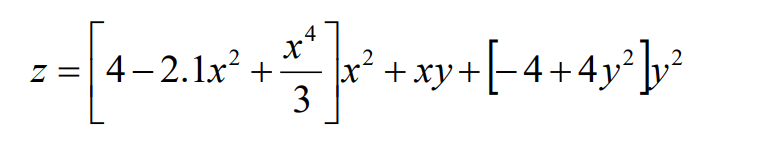

In [299]:
def z(X):
  """ cost function 1: """
  x, y = X[0], X[1]
  return (4 - 2.1*(x**2) + (x**4)/3)*(x**2) + x*y + (4*(y**2) - 4)*(y**2)

### Computing the particle swarm optimization with 5 different value of seed  

best is : [-1.03162845] with parameters [-0.08984201  0.7126564 ]
Computation time: 0.12628650665283203


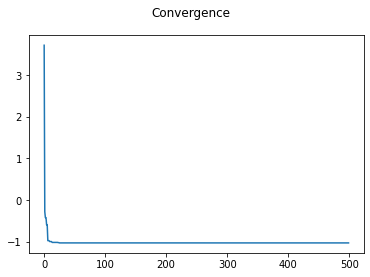

In [508]:
# seed = 10
best_fit_list1 = pso(z, interval=([-3, -2], [3, 2]), swarm_size = 20, dimension=2, w=.7, lambd=2.1, iteration=500, minimization=True, seed=10)

best is : [-1.03162845] with parameters [-0.08984201  0.7126564 ]
Computation time: 0.1124720573425293


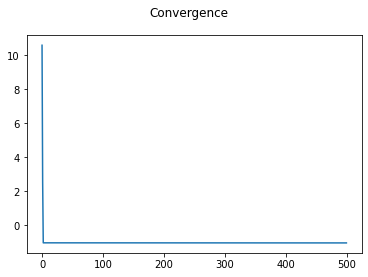

In [509]:
# with seed = 20
best = pso(z, interval=([-3, -2], [3, 2]), swarm_size = 20, dimension=2, w=.7, lambd=2.1, iteration=500, minimization=True, seed=20)

best is : [-1.03162845] with parameters [-0.08984201  0.7126564 ]
Computation time: 0.11959028244018555


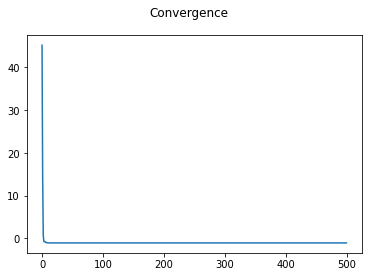

In [511]:
# with seed = 30
best = pso(z, interval=([-3, -2], [3, 2]), swarm_size = 20, dimension=2, w=.7, lambd=2.1, iteration=500, minimization=True, seed=30)

best is : [-1.03162845] with parameters [-0.08984201  0.7126564 ]
Computation time: 0.12604117393493652


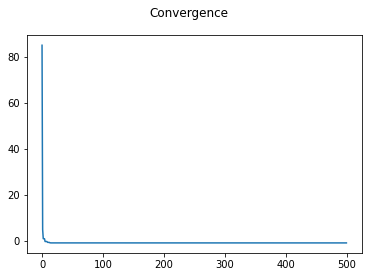

In [514]:
# with seed = 40
best = pso(z, interval=([-3, -2], [3, 2]), swarm_size = 20, dimension=2, w=.7, lambd=2.1, iteration=500, minimization=True, seed=40)

best is : [-1.03162845] with parameters [ 0.08984201 -0.7126564 ]
Computation time: 0.12110781669616699


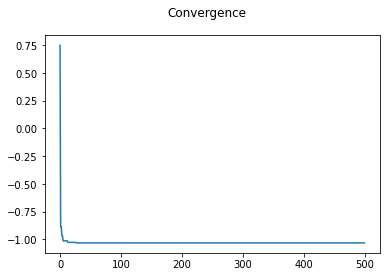

In [520]:
# with seed = 50
best = pso(z, interval=([-3, -2], [3, 2]), swarm_size = 20, dimension=2, w=.7, lambd=2.1, iteration=500, minimization=True, seed=50)

**As we can see we always get the minimum of this cost function just with 500 iterations and 20 particles no matter the value of seed we choose** and the computation time is around 0.14 seconds. But  we have to deel with hyperparameters w or lambd to get a good result

# **Problem 2**
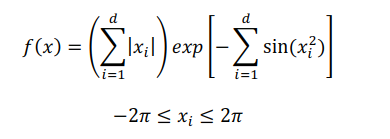

In [263]:
def f(X):
  """ cost function 2: """
  return np.sum(np.abs(X), axis=0) * np.exp(-1 * np.sum(np.sin(np.power(X, 2)), axis=0))

best is : [5.17757083e-07] with parameters [ 5.28552943e-09 -8.41282869e-09  5.04058725e-07]
Computation time: 0.11894440650939941


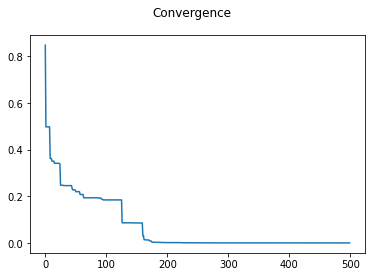

In [542]:
# seed = 10
dimension = 3
best_fit_list2 = pso(f, interval=([-2*np.pi, 2*np.pi], ), swarm_size = 20, dimension=dimension, w=.7, lambd=2.1, iteration=500, minimization=True, seed=10)

best is : [0.03895298] with parameters [-0.02328119 -0.01429193  0.00140902]
Computation time: 0.12609243392944336


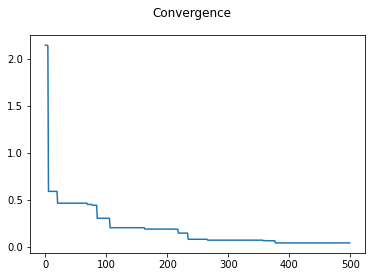

In [536]:
# seed = 20
dimension = 3
best = pso(f, interval=([-2*np.pi, 2*np.pi], ), swarm_size = 20, dimension=dimension, w=.9, lambd=2.1, iteration=500, minimization=True, seed=20)

best is : [0.00806839] with parameters [ 0.00263174 -0.00461576  0.00082112]
Computation time: 0.13289976119995117


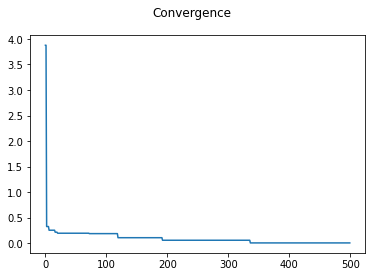

In [534]:
# seed = 30
dimension = 3
best = pso(f, interval=([-2*np.pi, 2*np.pi], ), swarm_size = 20, dimension=dimension, w=1, lambd=2.1, iteration=500, minimization=True, seed=30)

best is : [0.02924469] with parameters [ 0.00201839 -0.00235342 -0.02489129]
Computation time: 0.13586211204528809


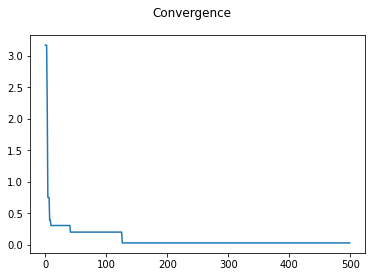

In [533]:
# seed = 40
dimension = 3
best = pso(f, interval=([-2*np.pi, 2*np.pi], ), swarm_size = 20, dimension=dimension, w=1, lambd=2.1, iteration=500, minimization=True, seed=40)

best is : [0.02986589] with parameters [ 0.01304435 -0.00779284  0.00903804]
Computation time: 0.1307225227355957


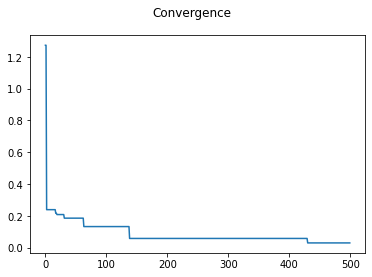

In [540]:
# seed = 50
dimension = 3
best = pso(f, interval=([-2*np.pi, 2*np.pi], ), swarm_size = 20, dimension=dimension, w=1, lambd=2.1, iteration=500, minimization=True, seed=50)

**Depend of the seed we have to deel with parameter w to get a good optimization. **

## Visualization of convergence of the 2 problems

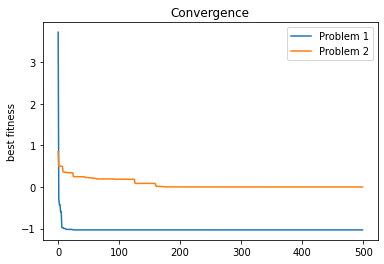

In [543]:
plt.plot(best_fit_list1, label = "Problem 1")
plt.plot(best_fit_list2, label = "Problem 2")
plt.ylabel('best fitness')
plt.title('Convergence')
plt.legend()
plt.show()